In [1]:
import pandas as pd
import numpy as np

In [2]:
#synthetic dataset
import pandas as pd

# Create a sample dataset for learning pandas
data = {
    "Order ID": [101, 102, 103, 104, 105],
    "Product": ["Apple iPhone", "Samsung TV", "HP Laptop", "Office Chair", "Wooden Desk"],
    "Category": ["Electronics", "Electronics", "Electronics", "Furniture", "Furniture"],
    "Quantity": [2, 1, 1, 4, 2],
    "Price": [999, 499, 799, 120, 300],
    "Discount": [0.1, 0.15, 0.05, 0.2, 0.1],
    "Order Date": ["2024-01-01", "2024-01-03", "2024-01-05", "2024-01-10", "2024-01-15"],
    "Region": ["North", "South", "East", "West", "North"]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
file_path = "sample_sales_data.csv"
df.to_csv(file_path, index=False)

### Subset and slicing

In [3]:
df = pd.read_csv('sample_sales_data.csv')

In [4]:
df.head()

,Order ID,Product,Category,Quantity,Price,Discount,Order Date,Region
0,101,Apple iPhone,Electronics,2,999,0.10,2024-01-01,North
1,102,Samsung TV,Electronics,1,499,0.15,2024-01-03,South
2,103,HP Laptop,Electronics,1,799,0.05,2024-01-05,East
3,104,Office Chair,Furniture,4,120,0.20,2024-01-10,West
4,105,Wooden Desk,Furniture,2,300,0.10,2024-01-15,North


In [5]:
# get only region north
df[df.Region == "North"][["Product"]]

,Product
0,Apple iPhone
4,Wooden Desk


In [6]:
# get only region north as series
df[df.Region == "North"].Product

0    Apple iPhone
4     Wooden Desk
Name: Product, dtype: object

In [7]:
# use .loc 
df.loc[:, "Product"]

0    Apple iPhone
1      Samsung TV
2       HP Laptop
3    Office Chair
4     Wooden Desk
Name: Product, dtype: object

In [8]:
# use .loc as object
df.loc[:, ["Product"]]

,Product
0,Apple iPhone
1,Samsung TV
2,HP Laptop
3,Office Chair
4,Wooden Desk


In [9]:
df.loc[df.Region == "North", "Product"]

0    Apple iPhone
4     Wooden Desk
Name: Product, dtype: object

In [10]:
df.loc[df.Region == "North", ["Product"]]

,Product
0,Apple iPhone
4,Wooden Desk


In [11]:
# use .iloc
df.iloc[1:-1, 1]

1      Samsung TV
2       HP Laptop
3    Office Chair
Name: Product, dtype: object

In [12]:
# use .iloc as object
df.iloc[1:-1, [1]]

,Product
1,Samsung TV
2,HP Laptop
3,Office Chair


In [13]:
df.iloc[1:-1][["Product"]]

,Product
1,Samsung TV
2,HP Laptop
3,Office Chair


In [14]:
# conditional slicing
df.loc[(df.Region == "North") & (df.Category.isin(["Furniture", "Electronics"]))]

,Order ID,Product,Category,Quantity,Price,Discount,Order Date,Region
0,101,Apple iPhone,Electronics,2,999,0.1,2024-01-01,North
4,105,Wooden Desk,Furniture,2,300,0.1,2024-01-15,North


In [15]:
# conditional slicing
df.loc[(df.Region == "North") & (df.Category.isin(["Furniture", "Electronics"]))].iloc[[1, -1]]

,Order ID,Product,Category,Quantity,Price,Discount,Order Date,Region
4,105,Wooden Desk,Furniture,2,300,0.1,2024-01-15,North
4,105,Wooden Desk,Furniture,2,300,0.1,2024-01-15,North


#### Querying

In [16]:
df.query('Region == "North" and Category in ("Electronics", "Furniture")')

,Order ID,Product,Category,Quantity,Price,Discount,Order Date,Region
0,101,Apple iPhone,Electronics,2,999,0.1,2024-01-01,North
4,105,Wooden Desk,Furniture,2,300,0.1,2024-01-15,North


In [17]:
# use @ for variable
categories = ["Electronics", "Furniture"]
df.query('Region == "North" and Category in @categories')

,Order ID,Product,Category,Quantity,Price,Discount,Order Date,Region
0,101,Apple iPhone,Electronics,2,999,0.1,2024-01-01,North
4,105,Wooden Desk,Furniture,2,300,0.1,2024-01-15,North


#### Grouping

In [18]:
df.groupby("Region")[["Quantity"]].sum().reset_index()

,Region,Quantity
0,East,1
1,North,4
2,South,1
3,West,4


In [19]:
df.groupby("Category")[["Quantity"]].mean().reset_index()

,Category,Quantity
0,Electronics,1.333333
1,Furniture,3.000000


In [20]:
# group by multiple columns
df.groupby(["Category", "Region"])[["Quantity"]].sum().reset_index()

,Category,Region,Quantity
0,Electronics,East,1
1,Electronics,North,2
2,Electronics,South,1
3,Furniture,North,2
4,Furniture,West,4


#### Aggregation

In [21]:
# simple aggregation
df.groupby("Category").agg(
    Total_qty=("Quantity", "sum"),
    Avg_price=("Price", "median")
).reset_index()

,Category,Total_qty,Avg_price
0,Electronics,4,799.0
1,Furniture,6,210.0


In [22]:
# custom aggregation column
def range_func(item):
    return item.max() - item.min()

df.groupby("Category").agg(
    range_price=("Price", range_func)
).reset_index()

,Category,range_price
0,Electronics,500
1,Furniture,180


#### Pivot table

In [23]:
"""
With one value to pivot.

values="Quantity": The column to aggregate.
index="Region": Rows are grouped by the Region column.
columns="Category": Creates separate columns for each unique value in the Category column.
aggfunc="sum": Aggregates values using the sum function.
fill_value=0: Fills missing values with 0.
"""
df.pivot_table(
    values="Quantity",
    index="Region",
    columns="Category",
    aggfunc="sum",
    fill_value=0
)

Category,Electronics,Furniture
Region,,
East,1,0
North,2,2
South,1,0
West,0,4


In [24]:
"""
With multiple values to pivot.

values="Quantity": The column to aggregate.
index="Region": Rows are grouped by the Region column.
columns="Category": Creates separate columns for each unique value in the Category column.
aggfunc="sum": Aggregates values using the sum function.
fill_value=0: Fills missing values with 0.
"""
df.pivot_table(
    values=["Quantity", "Price"],
    index="Region",
    columns="Category",
    aggfunc="sum",
    fill_value=0
)

Price              Quantity          
Category Electronics Furniture Electronics Furniture
Region                                              
East             799         0           1         0
North            999       300           2         2
South            499         0           1         0
West               0       120           0         4

#### apply

In [25]:
"""
The apply function allows you to apply a function (or lambda) to either rows or columns.
row is axis=0 
"""
df[["Price"]].apply(lambda x: x * 0.1, axis=0)

,Price
0,99.9
1,49.9
2,79.9
3,12.0
4,30.0


#### map

In [26]:
"""
The map function works element-wise on a Series. It’s faster and simpler than apply when working with a single column.
therefore no need axis
"""
df[["Price"]].map(lambda x: x * 0.1)

,Price
0,99.9
1,49.9
2,79.9
3,12.0
4,30.0


#### applymap

In [27]:
"""
The applymap function applies a function to every element in a DataFrame (used for DataFrames, not Series).
"""

'\nThe applymap function applies a function to every element in a DataFrame (used for DataFrames, not Series).\n'

In [28]:
df[["Price"]].applymap(lambda x: x * 0.1)

/var/folders/4d/c92r7j0x63v8v0t9zqv4cxpr0000gn/T/ipykernel_3178/1884092189.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["Price"]].applymap(lambda x: x * 0.1)


,Price
0,99.9
1,49.9
2,79.9
3,12.0
4,30.0


#### complex lambda

In [29]:

data = {
    "Order ID": [101, 102, 103, 104, 105],
    "Product": ["Apple iPhone", "Samsung TV", "HP Laptop", "Office Chair", "Wooden Desk"],
    "Category": ["Electronics", "Electronics", "Electronics", "Furniture", "Furniture"],
    "Quantity": [2, 1, 1, 4, 2],
    "Price": [999, 499, 799, 120, 300],
    "Discount": [0.1, 0.15, 0.05, 0.2, 0.1],
    "Order Date": ["2024-01-01", "2024-01-03", "2024-01-05", "2024-01-10", "2024-01-15"],
    "Region": ["North", "South", "East", "West", "North"]
}

df = pd.DataFrame(data)

In [30]:
df.head()

,Order ID,Product,Category,Quantity,Price,Discount,Order Date,Region
0,101,Apple iPhone,Electronics,2,999,0.10,2024-01-01,North
1,102,Samsung TV,Electronics,1,499,0.15,2024-01-03,South
2,103,HP Laptop,Electronics,1,799,0.05,2024-01-05,East
3,104,Office Chair,Furniture,4,120,0.20,2024-01-10,West
4,105,Wooden Desk,Furniture,2,300,0.10,2024-01-15,North


In [31]:
def calculate_final_cost(row, tax_rate, shipping_cost):
    # row is the row from dataframe
    base_cost = row["Quantity"] * row["Price"]
    discount_amount = base_cost * row["Discount"]
    discount_cost = base_cost - discount_amount
    tax_amount = discount_cost* tax_rate
    final_cost = discount_cost + tax_amount + shipping_cost

    return final_cost

# arguments for the function
tax_rate = 0.05
shipping_cost = 20

# apply upon each row
df["Final Cost"] = df.apply(lambda row: calculate_final_cost(row, tax_rate, shipping_cost), axis=1)
df.head(-1)

,Order ID,Product,Category,Quantity,Price,Discount,Order Date,Region,Final Cost
0,101,Apple iPhone,Electronics,2,999,0.10,2024-01-01,North,1908.1100
1,102,Samsung TV,Electronics,1,499,0.15,2024-01-03,South,465.3575
2,103,HP Laptop,Electronics,1,799,0.05,2024-01-05,East,817.0025
3,104,Office Chair,Furniture,4,120,0.20,2024-01-10,West,423.2000


#### Barplot

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
# Sample dataset with scores of students in different subjects
data = {
    "Student": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hank"],
    "Subject": ["Math", "Science", "History", "Math", "Science", "History", "Math", "Science"],
    "Score": [85, 78, 92, 88, 74, 81, 91, 69]
}

# Convert to DataFrame
df = pd.DataFrame(data)

In [38]:
avg_scores = df.groupby("Subject").agg(
    avg_scores=("Score", "mean")
).reset_index()

/var/folders/4d/c92r7j0x63v8v0t9zqv4cxpr0000gn/T/ipykernel_3178/1367624010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


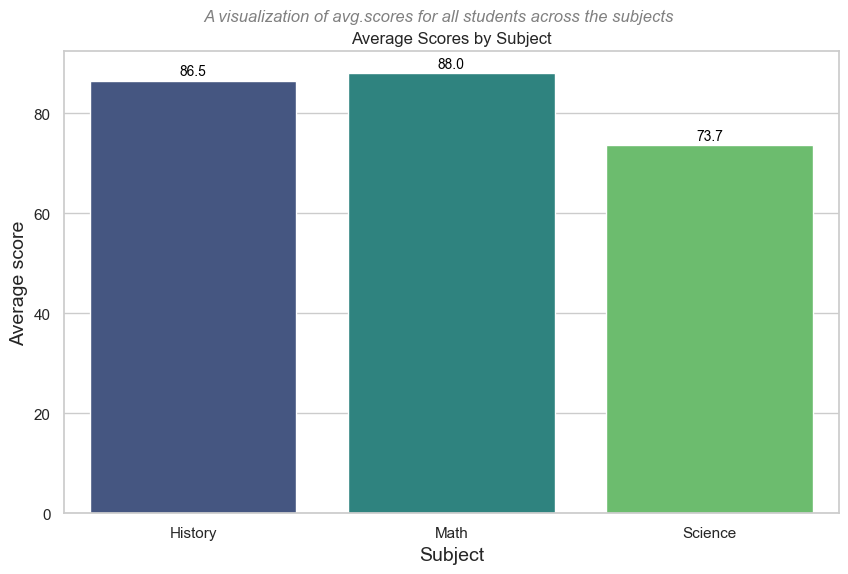

In [43]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    x="Subject",
    y="avg_scores",
    data=avg_scores,
    palette="viridis"
)

plt.title("Average Scores by Subject")
plt.suptitle(
    "A visualization of avg.scores for all students across the subjects",
    y=0.95, fontsize=12, style="italic", color="gray"
)
plt.xlabel("Subject", fontsize=14)
plt.ylabel("Average score", fontsize=14)

# add values on top pf the bar
for idx, val in enumerate(avg_scores.avg_scores):
    ax.text(
        idx, 
        val + 1,
        f"{val:.1f}",
        color="black",
        ha="center",
        fontsize=10
    )

plt.show()

#### Lineplot

In [45]:
data = {
    "Month": ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
    "Product_A_Sales": [120, 150, 170, 200, 250, 300, 310, 400, 420, 380, 390, 450],
    "Product_B_Sales": [100, 120, 140, 160, 180, 210, 230, 240, 250, 270, 290, 310]
}

# Convert to DataFrame
df = pd.DataFrame(data)

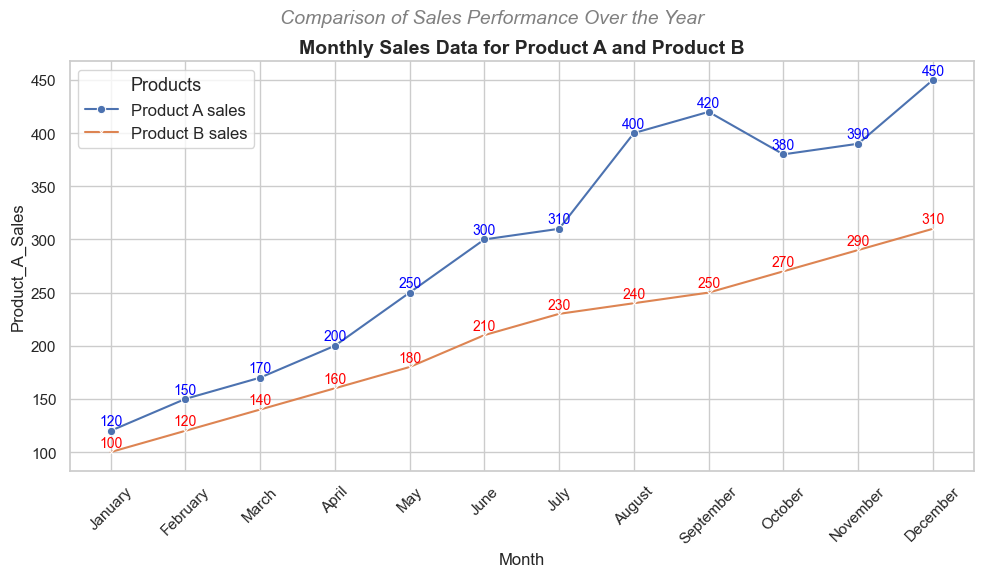

In [50]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.lineplot(
    x="Month",
    y="Product_A_Sales",
    data=df,
    label="Product A sales",
    marker="o"
)
# second lineplot
sns.lineplot(
    x="Month",
    y="Product_B_Sales",
    data=df,
    label="Product B sales",
    marker="x"
)

plt.title(
    "Monthly Sales Data for Product A and Product B",
    fontsize=14, 
    weight="bold"
)
plt.suptitle(
    "Comparison of Sales Performance Over the Year",
    y=0.96, fontsize=14, style="italic", color="gray"
)

plt.xticks(rotation=45)
plt.legend(
    title="Products", 
    loc="upper left",
    fontsize=12,
    title_fontsize=13
)

# add label
for i, (a, b) in enumerate(zip(df.Product_A_Sales, df.Product_B_Sales)):
    ax.text(i, a + 5, f"{a}", color="blue", ha="center", fontsize=10)
    ax.text(i, b + 5, f"{b}", color="red", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

#### Scatter plot

In [51]:
# Sample dataset with house size, price, and region
data = {
    "House Size (sq ft)": [1500, 1800, 2400, 3000, 3500, 4000, 1200, 2200, 2700, 3200, 1000, 4200],
    "Price (in $1000s)": [300, 340, 450, 500, 600, 650, 250, 430, 520, 580, 200, 700],
    "Region": ["East", "West", "North", "East", "West", "North", "South", "East", "West", "North", "South", "East"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

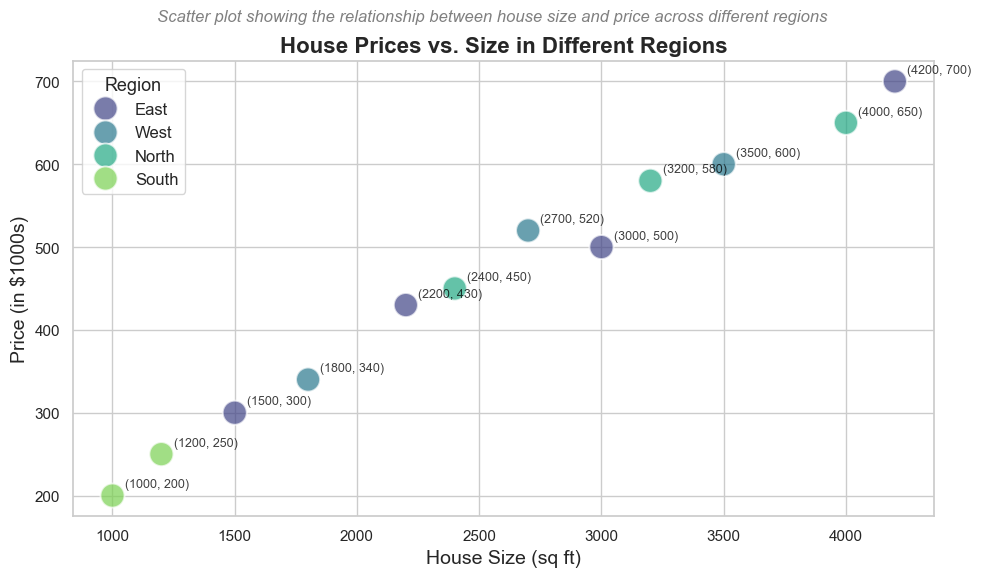

In [62]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

ax = sns.scatterplot(
    x="House Size (sq ft)",
    y="Price (in $1000s)",
    hue="Region",
    data=df,
    palette="viridis",
    s=300,
    alpha=0.7
)

plt.title(
    "House Prices vs. Size in Different Regions",
    fontsize=16,
    weight="bold"
)
plt.suptitle(
    "Scatter plot showing the relationship between house size and price across different regions",
    y=0.96, fontsize=12, style="italic", color="gray"
)
plt.xlabel("House Size (sq ft)", fontsize=14)
plt.ylabel("Price (in $1000s)", fontsize=14)

plt.legend(
    title="Region",
    loc="upper left",
    fontsize=12,
    title_fontsize=13
)

for i in range(df.shape[0]):
    ax.text(
        df["House Size (sq ft)"].iloc[i] + 50,
        df["Price (in $1000s)"].iloc[i] + 10,
        f"({df['House Size (sq ft)'][i]}, {df['Price (in $1000s)'][i]})",
        fontsize=9,
        color="black",
        alpha=0.75
    )

plt.tight_layout()
plt.show()

#### Bubble plot

In [73]:
# Sample dataset with sales revenue, advertising spending, and number of customers
data = {
    "Region": ["North", "East", "West", "South", "North", "East", "West", "South", "North", "East", "West", "South"],
    "Month": ["January", "January", "January", "January", "February", "February", "February", "February", "March", "March", "March", "March"],
    "Sales Revenue ($1000s)": [200, 240, 230, 280, 300, 320, 310, 350, 250, 290, 270, 330],
    "Advertising Spending ($1000s)": [50, 60, 55, 65, 70, 80, 75, 85, 55, 65, 60, 70],
    "Customers Reached": [5000, 7000, 6500, 8000, 9000, 10000, 9500, 11000, 6000, 8000, 7000, 8500]
}

# Convert to DataFrame
df = pd.DataFrame(data)

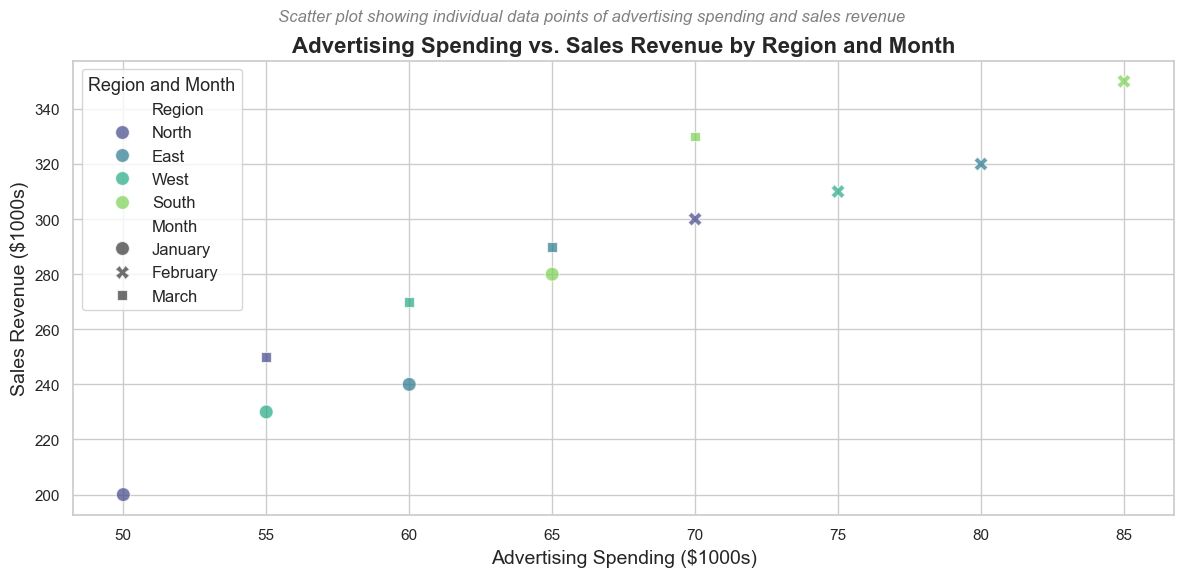

In [74]:
# Set up the figure size and style for the scatter plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Set a clean grid style for better readability

# Create scatter plot using Seaborn as the original plot
ax = sns.scatterplot(
    x="Advertising Spending ($1000s)", 
    y="Sales Revenue ($1000s)", 
    hue="Region", 
    style="Month",
    data=df, 
    palette="viridis", 
    s=100,  # Size of the markers
    alpha=0.7  # Transparency level
)

# Add title, subtitle, and labels
plt.title("Advertising Spending vs. Sales Revenue by Region and Month", fontsize=16, weight='bold')
plt.suptitle("Scatter plot showing individual data points of advertising spending and sales revenue", 
             y=0.96, fontsize=12, style='italic', color='gray')
plt.xlabel("Advertising Spending ($1000s)", fontsize=14)
plt.ylabel("Sales Revenue ($1000s)", fontsize=14)

# Customize the legend
plt.legend(title="Region and Month", loc="upper left", fontsize=12, title_fontsize=13)

# Show the plot
plt.tight_layout()  # Adjust the layout to avoid clipping
plt.show()


In [76]:
# Aggregate the dataset by region to create bubbles that summarize similar values
df_aggregated = df.groupby("Region").agg({
    "Advertising Spending ($1000s)": "mean",
    "Sales Revenue ($1000s)": "mean",
    "Customers Reached": "sum"
}).reset_index()

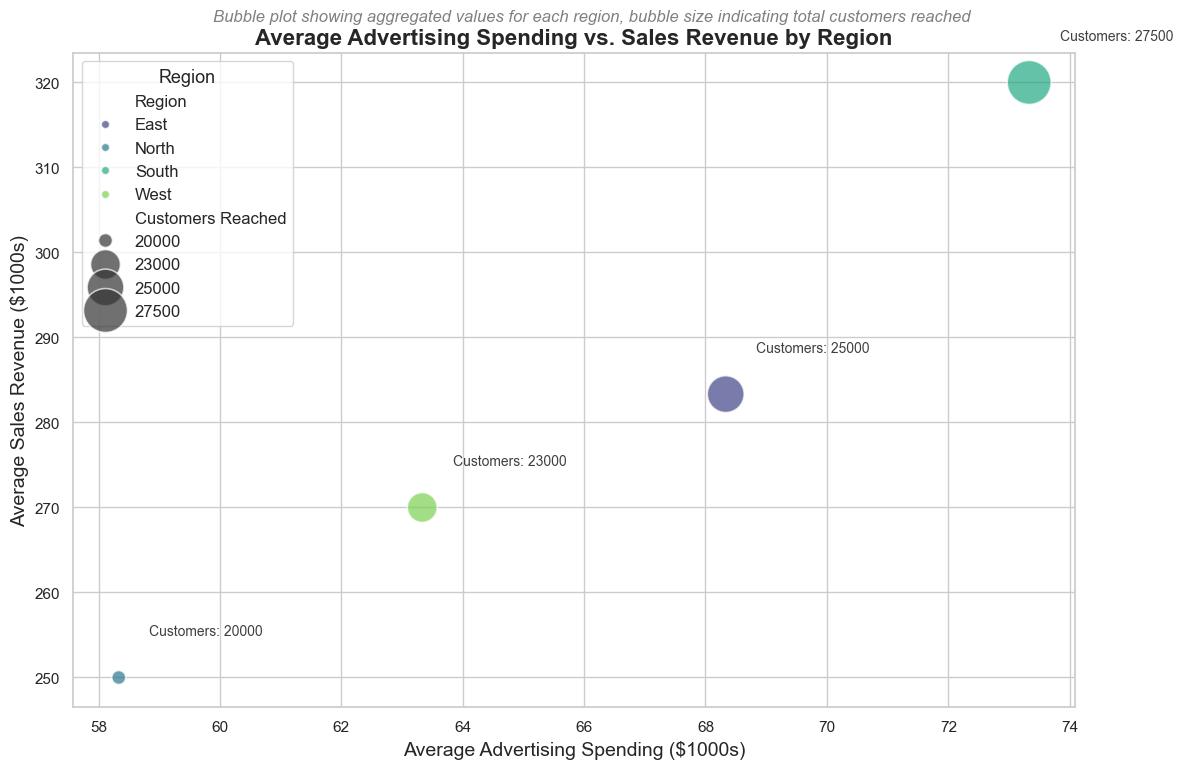

In [77]:
# Set up the figure size and style for the bubble plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set a clean grid style for better readability

# Create bubble plot using Seaborn scatter plot with varying sizes
ax = sns.scatterplot(
    x="Advertising Spending ($1000s)", 
    y="Sales Revenue ($1000s)", 
    size="Customers Reached", 
    hue="Region", 
    data=df_aggregated, 
    palette="viridis", 
    sizes=(100, 1000),  # Define range of bubble sizes
    alpha=0.7  # Transparency level
)

# Add title, subtitle, and labels
plt.title("Average Advertising Spending vs. Sales Revenue by Region", fontsize=16, weight='bold')
plt.suptitle("Bubble plot showing aggregated values for each region, bubble size indicating total customers reached", 
             y=0.96, fontsize=12, style='italic', color='gray')
plt.xlabel("Average Advertising Spending ($1000s)", fontsize=14)
plt.ylabel("Average Sales Revenue ($1000s)", fontsize=14)

# Customize the legend
plt.legend(title="Region", loc="upper left", fontsize=12, title_fontsize=13)

# Add data labels on each bubble
for i in range(len(df_aggregated)):
    ax.text(
        df_aggregated["Advertising Spending ($1000s)"].iloc[i] + 0.5,  # Slight offset for readability
        df_aggregated["Sales Revenue ($1000s)"].iloc[i] + 5,
        f"Customers: {df_aggregated['Customers Reached'].iloc[i]}",
        fontsize=10,
        color="black",
        alpha=0.75
    )

# Show the plot
plt.tight_layout()  # Adjust the layout to avoid clipping
plt.show()
